In [2]:
!pip install pandas textblob scikit-learn

import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


Defaulting to user installation because normal site-packages is not writeable


In [14]:
# Load the dataset
file_path = 'uber_reviews_without_reviewid.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Display the first few rows to understand the dataset
df.head()


,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,User_0,NaN,Good,5,0,4.556.10005,2024-12-18 17:17:19,NaN,NaN,4.556.10005
1,User_1,NaN,Nice,5,0,4.556.10005,2024-12-18 17:17:17,NaN,NaN,4.556.10005
2,User_2,NaN,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,NaN,NaN,4.532.10001
3,User_3,NaN,Good,4,0,4.556.10005,2024-12-18 17:08:27,NaN,NaN,4.556.10005
4,User_4,NaN,exllence,5,0,4.556.10005,2024-12-18 17:08:16,NaN,NaN,4.556.10005


In [4]:
# Drop unnecessary columns
columns_to_drop = ["userImage", "replyContent", "repliedAt"]
df = df.drop(columns=columns_to_drop)

# Display dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userName              12000 non-null  object
 1   content               12000 non-null  object
 2   score                 12000 non-null  int64 
 3   thumbsUpCount         12000 non-null  int64 
 4   reviewCreatedVersion  10260 non-null  object
 5   at                    12000 non-null  object
 6   appVersion            10260 non-null  object
dtypes: int64(2), object(5)
memory usage: 656.4+ KB


In [15]:
df.describe()

,userImage,score,thumbsUpCount
count,0.0,12000.000000,12000.000000
mean,NaN,3.925417,0.517000
std,NaN,1.658940,6.298268
min,NaN,1.000000,0.000000
25%,NaN,3.000000,0.000000
50%,NaN,5.000000,0.000000
75%,NaN,5.000000,0.000000
max,NaN,5.000000,239.000000


In [8]:
# Add sentiment polarity (from TextBlob)
df['sentiment_polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Map polarity to categories
def map_sentiment(polarity):
    if polarity > 0.2:
        return 'positive'
    elif polarity < -0.2:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment_polarity'].apply(map_sentiment)

# Display the updated dataframe
df.tail()


,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment_polarity,sentiment_category
11995,User_11995,Excellent!!!,5,0,4.553.10000,2024-11-24 21:59:16,4.553.10000,1.000000,positive
11996,User_11996,Worst experience after 10pm in Hyde cityno aut...,5,0,4.552.10000,2024-11-24 21:56:10,4.552.10000,-1.000000,negative
11997,User_11997,Exceptional,5,0,4.552.10000,2024-11-24 21:52:21,4.552.10000,0.666667,positive
11998,User_11998,Good Service.,5,0,4.553.10000,2024-11-24 21:50:30,4.553.10000,0.700000,positive
11999,User_11999,"Very bad experience with this app, booked a sh...",1,0,NaN,2024-11-24 21:44:44,NaN,-0.302500,negative


In [9]:
# Features and labels
X = df['content']
y = df['sentiment_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display data shapes
X_train.shape, X_test.shape


((9600,), (2400,))

In [10]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [11]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.54      0.66       194
     neutral       0.79      0.91      0.85       687
    positive       0.96      0.95      0.96      1519

    accuracy                           0.90      2400
   macro avg       0.87      0.80      0.82      2400
weighted avg       0.91      0.90      0.90      2400



In [12]:
# Add predictions to the dataset
df['predicted_sentiment'] = model.predict(vectorizer.transform(df['content']))

# Display updated dataframe
df.head()


,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment_polarity,sentiment_category,predicted_sentiment
0,User_0,Good,5,0,4.556.10005,2024-12-18 17:17:19,4.556.10005,0.7,positive,positive
1,User_1,Nice,5,0,4.556.10005,2024-12-18 17:17:17,4.556.10005,0.6,positive,positive
2,User_2,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,4.532.10001,0.2,neutral,neutral
3,User_3,Good,4,0,4.556.10005,2024-12-18 17:08:27,4.556.10005,0.7,positive,positive
4,User_4,exllence,5,0,4.556.10005,2024-12-18 17:08:16,4.556.10005,0.0,neutral,neutral


In [19]:
print(df.columns)


Index(['userName', 'userImage', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt',
       'appVersion'],
      dtype='object')


In [21]:
from textblob import TextBlob

# Calculate sentiment polarity
df['sentiment_polarity'] = df['content'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)


In [22]:
df['sentiment_category'] = df['sentiment_polarity'].apply(
    lambda polarity: 'positive' if polarity > 0.2 else 'negative' if polarity < -0.2 else 'neutral'
)


In [23]:
print(df.head())


  userName  userImage          content  score  thumbsUpCount  \
0   User_0        NaN             Good      5              0   
1   User_1        NaN             Nice      5              0   
2   User_2        NaN  Very convenient      5              0   
3   User_3        NaN             Good      4              0   
4   User_4        NaN         exllence      5              0   

  reviewCreatedVersion                   at replyContent repliedAt  \
0          4.556.10005  2024-12-18 17:17:19          NaN       NaN   
1          4.556.10005  2024-12-18 17:17:17          NaN       NaN   
2          4.532.10001  2024-12-18 17:09:42          NaN       NaN   
3          4.556.10005  2024-12-18 17:08:27          NaN       NaN   
4          4.556.10005  2024-12-18 17:08:16          NaN       NaN   

    appVersion  sentiment_polarity sentiment_category  
0  4.556.10005                 0.7           positive  
1  4.556.10005                 0.6           positive  
2  4.532.10001            

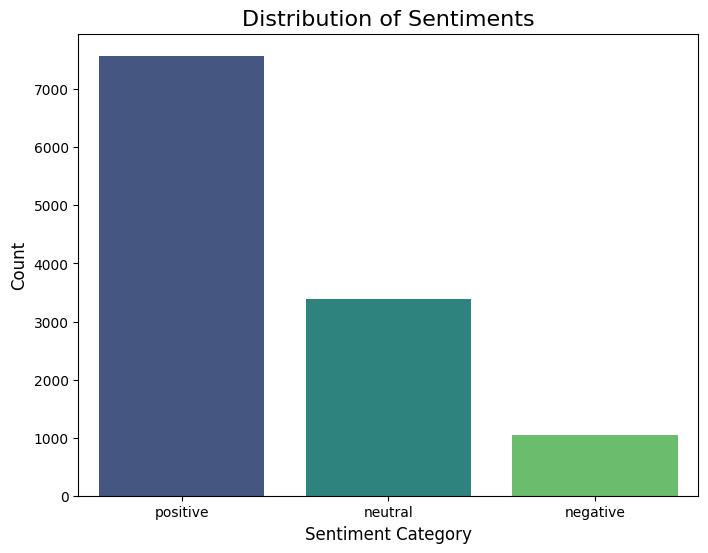

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette='viridis')
plt.title('Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


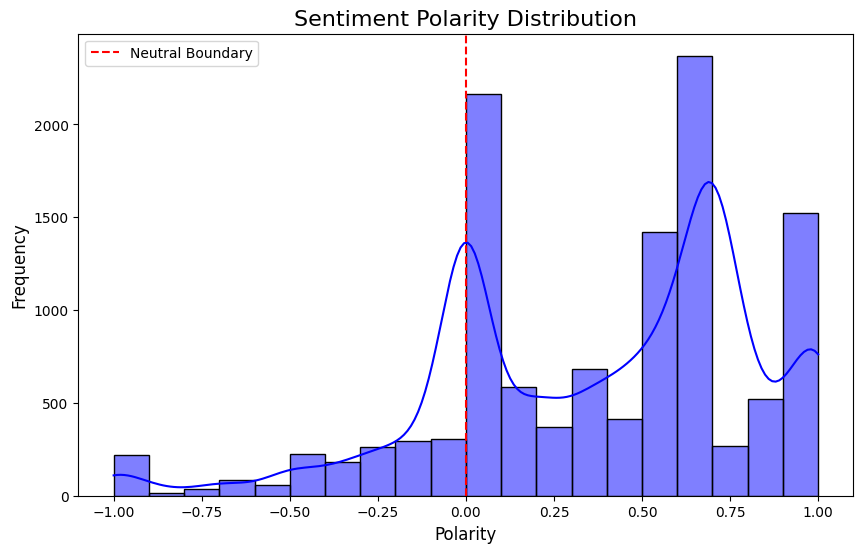

In [25]:
# Histogram for sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_polarity'], bins=20, kde=True, color='blue')
plt.title('Sentiment Polarity Distribution', fontsize=16)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(0, color='red', linestyle='--', label='Neutral Boundary')
plt.legend()
plt.show()


In [27]:
# Save the updated dataset to a CSV
output_path = 'uber_reviews_with_predictions.csv'  # Update the output file path if needed
df.to_csv(output_path, index=False)

print(f"Processed dataset with predictions saved to: {output_path}")


Processed dataset with predictions saved to: uber_reviews_with_predictions.csv
